# 02 - Principal Component Analysis (PCA)

In this notebook, we apply **PCA** for dimensionality reduction and visualization.

### Objectives:
- Reduce the number of features while retaining maximum variance
- Visualize PCA-transformed features
- Determine optimal number of components using explained variance


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Step 1: Load Cleaned Dataset
We use the preprocessed dataset saved in the previous step.


In [ ]:
df = pd.read_csv('data/heart_disease.csv')
df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,-0.721976,0,False,False,False,False,True,False,True,True,False
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,2.478425,1,False,False,True,False,True,True,False,False,False
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1.411625,1,False,False,True,False,True,True,False,False,True
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,-0.721976,0,False,True,False,False,False,False,True,False,False
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,-0.721976,0,True,False,False,False,True,False,False,False,False


## Step 2: Separate Features and Target


In [4]:
X = df.drop('target', axis=1)
y = df['target']


## Step 3: Apply PCA
Use `n_components=None` to retain all components initially, then analyze the variance.


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)


## Step 4: Explained Variance Ratio
Plot the amount of variance explained by each principal component.


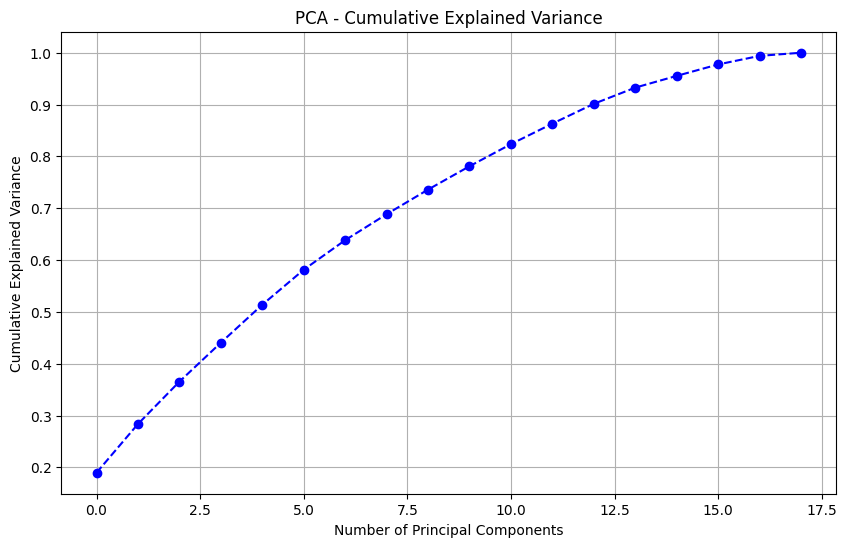

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()


## Step 5: Choose Number of Components
Keep components that explain ~95% of the variance.


In [ ]:
pca = PCA(n_components=10)
X_pca_reduced = pca.fit_transform(X_scaled)


## Step 6: Visualize the First 2 Principal Components


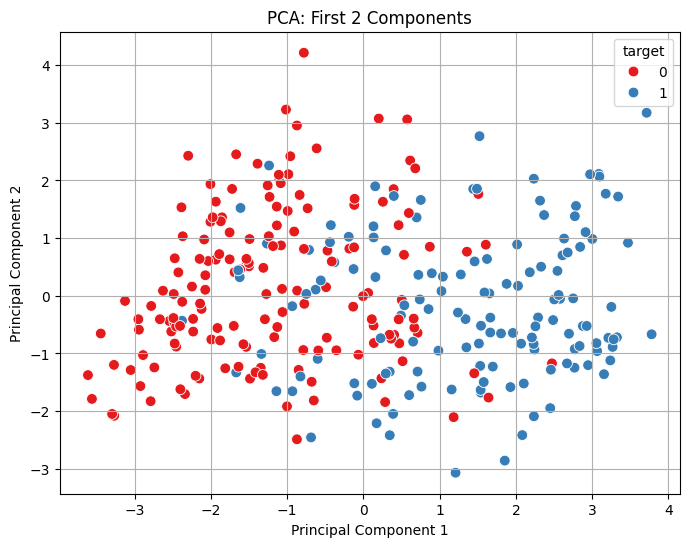

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_reduced[:, 0], y=X_pca_reduced[:, 1], hue=y, palette='Set1', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First 2 Components')
plt.grid(True)
plt.show()


## Step 7: Save PCA Transformed Data


In [ ]:
pca_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(X_pca_reduced.shape[1])])
pca_df['target'] = y.values

pca_df.to_csv('data/heart_disease.csv', index=False)
